In [115]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn-pastel')

# Investigating the Titanic Dataset

## Question Brainstorm

* What factors made people more likely to survive?
* Do the genders of different socio-economic classes vary? For example, are there more men in first class than women?
* Is the age of a higher socio-economic class less likely to be estimated?
* Are certain decks more likely to survive?
* Was it more expensive to get on at different ports?

In [2]:
titanic_data = pd.read_csv('titanic-data.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
def get_deck(cabin):
    if pd.isnull(cabin):
        return np.NaN
    return cabin[:1]

In [4]:
titanic_data['Deck'] = titanic_data['Cabin'].apply(get_deck)

In [5]:
titanic_data['Deck'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [6]:
titanic_data[titanic_data['Deck'] == 'T']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S,T


In [7]:
deck_survived = titanic_data.groupby('Deck')['Survived'].sum()

In [8]:
deck_counts = titanic_data.groupby('Deck')['PassengerId'].count()

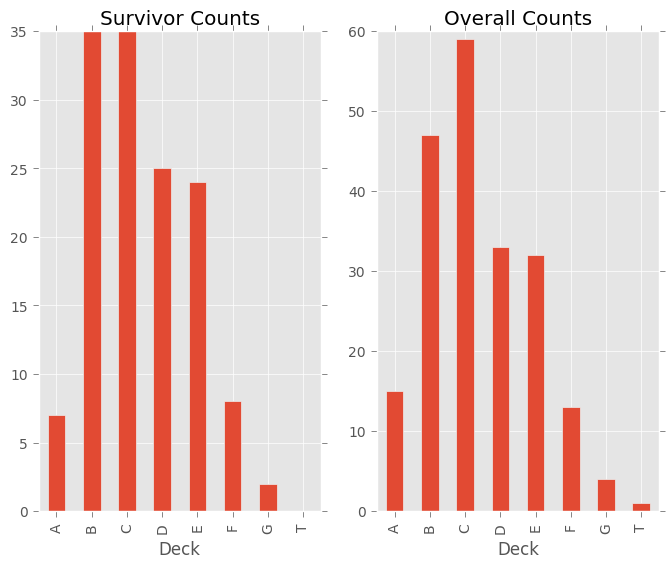

In [24]:
fig, axs = plt.subplots(1,2)
deck_survived.plot(kind='bar', title='Survivor Counts', ax=axs[0]);
deck_counts.plot(kind='bar', title='Overall Counts', ax=axs[1]);

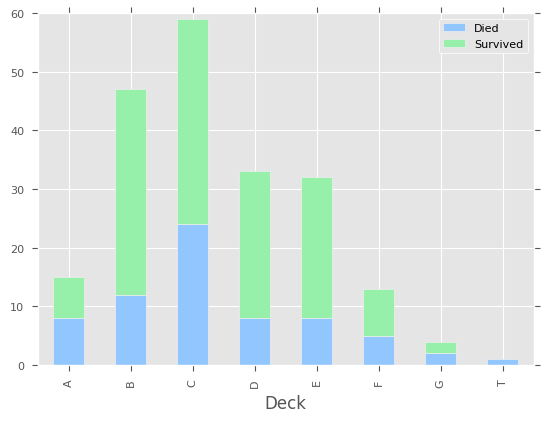

In [73]:
style.use('seaborn-pastel')
def label_survived(num):
    word_labels = {0: 'Died', 1: 'Survived'}
    return word_labels[num]
pd.crosstab(titanic_data['Deck'], titanic_data['Survived'].apply(label_survived)).plot.bar(stacked=True);
plt.legend(frameon=True);

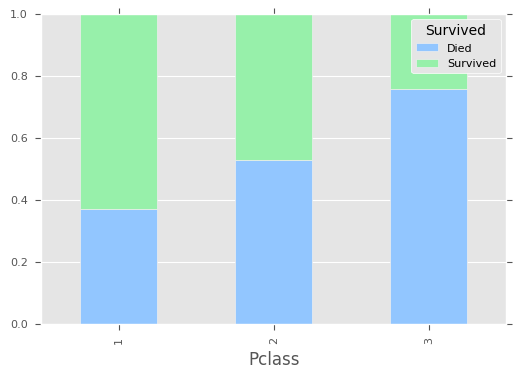

In [118]:
pd.crosstab(titanic_data['Pclass'], titanic_data['Survived'].apply(label_survived), normalize=0).plot.bar(stacked=True);
# plt.legend(frameon=True);

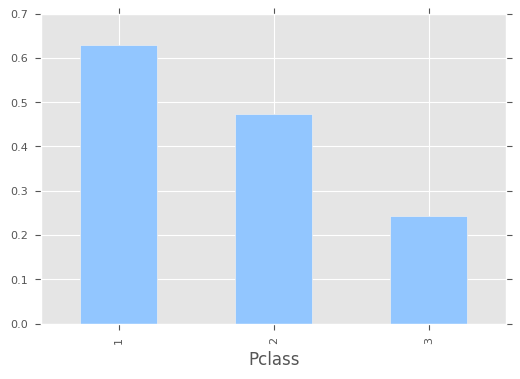

In [120]:
pd.crosstab(titanic_data['Pclass'], titanic_data['Survived'].apply(label_survived), normalize=0)['Survived'].plot.bar();
# plt.legend(frameon=True);

In [12]:
pd.crosstab(titanic_data['Sex'], titanic_data['Survived'], normalize=0, margins=True)

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908
All,0.616162,0.383838


In [13]:
pd.crosstab(titanic_data['Sex'], titanic_data['Survived'], normalize=1)

Survived,0,1
Sex,,
female,0.147541,0.681287
male,0.852459,0.318713


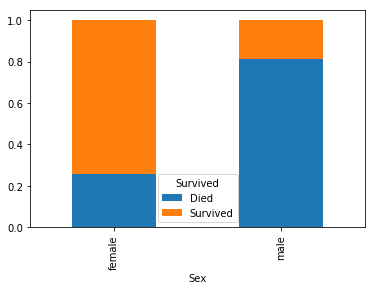

In [14]:
pd.crosstab(titanic_data['Sex'], titanic_data['Survived'].apply(label_survived), normalize=0).plot.bar(stacked=True);

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025C28550AC8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000025C296ECDA0>], dtype=object)

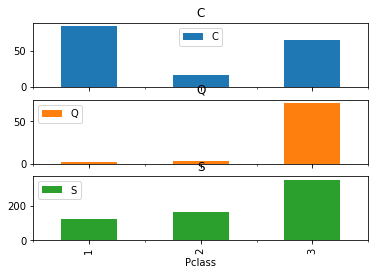

In [15]:
# nifty trick found at: http://themrmax.github.io/2015/11/13/grouped-histograms-for-categorical-data-in-pandas.html
ag = titanic_data.groupby('Pclass')['Embarked'].value_counts().sort_index()
ag.unstack().plot(kind='bar', subplots=True)

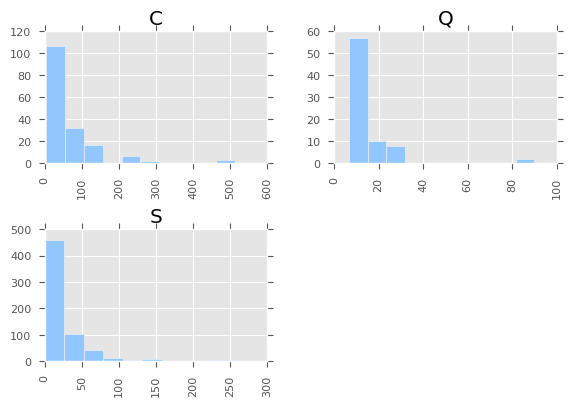

In [72]:
titanic_data.hist(by='Embarked', column='Fare');

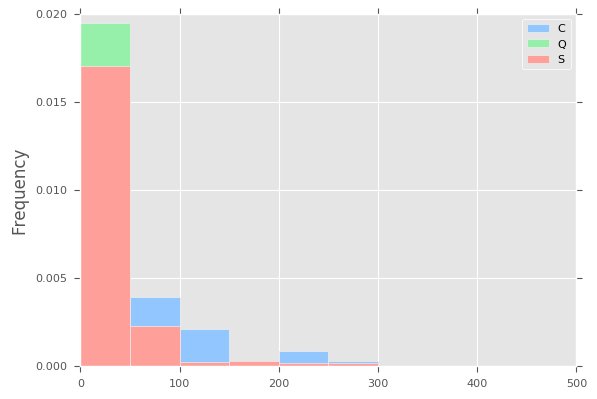

In [44]:
# binwidth trick found: http://stackoverflow.com/questions/6986986/bin-size-in-matplotlib-histogram
binwidth = 50
binned = np.arange(min(titanic_data['Fare']), max(titanic_data['Fare']), binwidth)
titanic_data.groupby('Embarked')['Fare'].plot.hist(normed=True, bins=binned, stacked=True);
plt.legend();

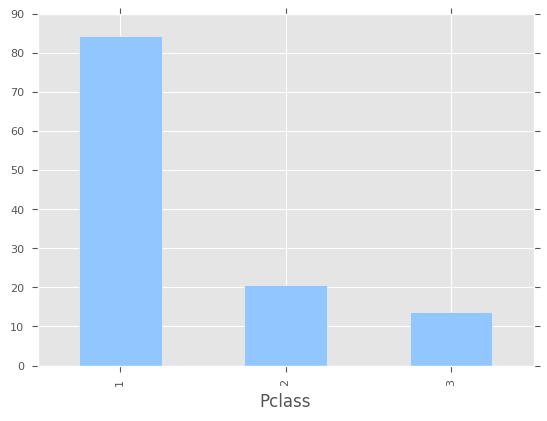

In [59]:
by_survivors = titanic_data.groupby('Survived')
by_class = titanic_data.groupby('Pclass')
by_class['Fare'].mean().plot(kind='bar')

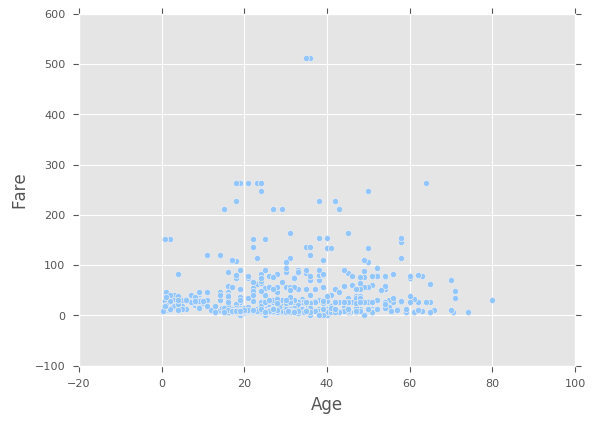

In [61]:
titanic_data.plot.scatter(x='Age', y='Fare')

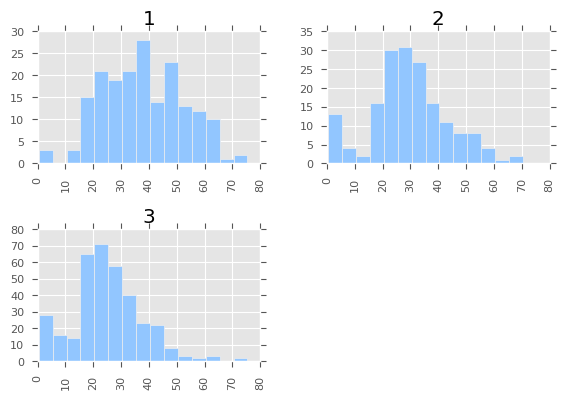

In [71]:
def bin_width(width, column):
    min_val = titanic_data[column].min()
    max_val = titanic_data[column].max()
    return np.arange(min_val, max_val, width)
titanic_data.hist(by='Pclass', column='Age', bins=bin_width(5, 'Age'));
plt.xlabel('Age in Years');


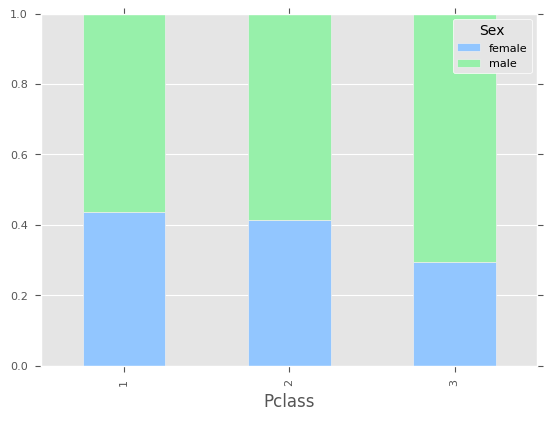

In [113]:
pd.crosstab(titanic_data['Pclass'], titanic_data['Sex'], normalize=0).plot.bar(stacked=True);

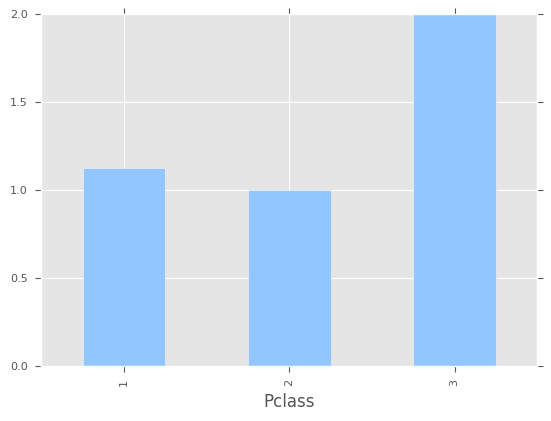

In [111]:
import math
def is_estimated(age):
    if pd.isnull(age):
        return True
    else:
        return age == math.ceil(age)
def normalize(series):
    return 1 + (series - series.min()) / (series.max() - series.min())
titanic_data['Estimated'] = titanic_data['Age'].apply(is_estimated)
estimated_pass = titanic_data[titanic_data['Estimated']]
normalize(estimated_pass.groupby('Pclass').size()).plot(kind='bar');